# CNN

Found 1836 images belonging to 2 classes.
Found 6208 images belonging to 2 classes.
Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/3
331/331 [==============================] - 62s 186ms/step - loss: 0.4408 - accuracy: 0.7671 - val_loss: 0.3193 - val_accuracy: 0.8540
Epoch 2/3
331/331 [==============================] - 48s 145ms/step - loss: 0.3475 - accuracy: 0.8241 - val_loss: 0.2268 - val_accuracy: 0.8635
Epoch 3/3
331/331 [==============================] - 48s 144ms/step - loss: 0.3320 - accuracy: 0.8252 - val_loss: 0.2005 - val_accuracy: 0.9016
dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


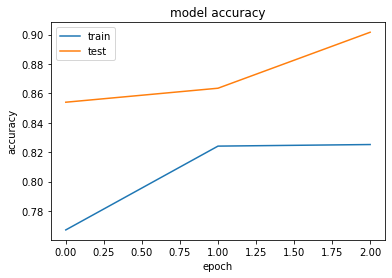

[0.7670763731002808, 0.8240983486175537, 0.8251762390136719]


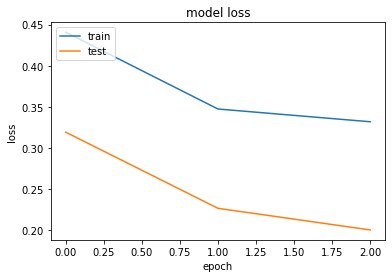

[0.44076302647590637, 0.3474532961845398, 0.33197128772735596]


In [6]:
# Importing the Keras libraries and packages
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from keras.preprocessing import image

# Initialising the CNN
classifier = Sequential()

classifier.add(Conv2D(32, (3, 3), input_shape = (64, 64, 3), activation = 'relu'))

classifier.add(MaxPooling2D(pool_size = (2, 2)))

classifier.add(Conv2D(32, (3, 3), activation="relu"))
classifier.add(MaxPooling2D(pool_size = (2, 2)))

classifier.add(Conv2D(32, (3, 3), activation="relu"))
classifier.add(MaxPooling2D(pool_size = (2, 2)))

classifier.add(Conv2D(32, (3, 3), activation="relu"))
classifier.add(MaxPooling2D(pool_size = (2, 2)))

classifier.add(Flatten())

classifier.add(Dense(activation="relu", units=128))
classifier.add(Dense(activation="relu", units=128))
classifier.add(Dense(activation="relu", units=128))
classifier.add(Dense(activation="sigmoid", units=1))

classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)
test_datagen = ImageDataGenerator(rescale = 1./255)

testing_set = test_datagen.flow_from_directory(r'C:\Users\Hp\COVID-19 CT\CT\for_testing',
                                                 target_size = (64, 64),
                                                 batch_size = 15,
                                                 class_mode = 'binary')

training_set = train_datagen.flow_from_directory(r'C:\Users\Hp\COVID-19 CT\CT\for_training',
                                                 target_size = (64, 64),
                                                 batch_size = 15,
                                                 class_mode = 'binary')
 
history = classifier.fit_generator(training_set, steps_per_epoch = 331, epochs = 3, validation_data = testing_set,
                            validation_steps = 42)
               
               
               

# plotting graphs 
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
print(history.history['accuracy'])
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
print(history.history['loss'])


In [7]:
import numpy as np
from keras.preprocessing import image
import matplotlib.pyplot as plt
test_image = image.load_img(r'C:\Users\Hp\COVID-19 CT\CT\for_validation\0.jpg', target_size = (64, 64))
test_image = image.img_to_array(test_image)
print(image.img_to_array(test_image))
test_image = np.expand_dims(test_image, axis = 0)
result = classifier.predict(test_image)
training_set.class_indices
if result[0][0] == 1:
    prediction = 'Covid'
    print('Covid')
else:
    prediction = 'Non-Covid'
    print('Non-Covid')

[[[ 41.  41.  41.]
  [ 42.  42.  42.]
  [ 42.  42.  42.]
  ...
  [ 41.  41.  41.]
  [ 42.  42.  42.]
  [ 41.  41.  41.]]

 [[ 41.  41.  41.]
  [ 42.  42.  42.]
  [ 42.  42.  42.]
  ...
  [ 43.  43.  43.]
  [ 41.  41.  41.]
  [ 42.  42.  42.]]

 [[ 42.  42.  42.]
  [ 42.  42.  42.]
  [ 42.  42.  42.]
  ...
  [ 42.  42.  42.]
  [ 44.  44.  44.]
  [ 43.  43.  43.]]

 ...

 [[145. 145. 145.]
  [123. 123. 123.]
  [ 70.  70.  70.]
  ...
  [164. 164. 164.]
  [ 66.  66.  66.]
  [ 37.  37.  37.]]

 [[ 73.  73.  73.]
  [198. 198. 198.]
  [157. 157. 157.]
  ...
  [148. 148. 148.]
  [ 50.  50.  50.]
  [ 37.  37.  37.]]

 [[ 51.  51.  51.]
  [ 48.  48.  48.]
  [ 55.  55.  55.]
  ...
  [154. 154. 154.]
  [ 21.  21.  21.]
  [ 37.  37.  37.]]]
Covid


In [10]:
classifier.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 62, 62, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 31, 31, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 29, 29, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 12, 12, 32)        9248      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 6, 6, 32)          0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 4, 4, 32)          9

123/123 [==============================] - 12s 96ms/step


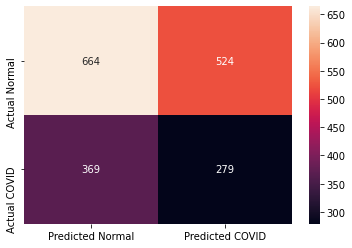

In [11]:
from sklearn.metrics import classification_report,confusion_matrix
preds = classifier.predict(testing_set,verbose=1)
predictions = preds.copy()
predictions[predictions <= 0.5] = 0
predictions[predictions > 0.5] = 1
cm = pd.DataFrame(data=confusion_matrix(testing_set.classes, predictions, labels=[0, 1]),index=["Actual Normal", "Actual COVID"],
columns=["Predicted Normal", "Predicted COVID"])
import seaborn as sns
sns.heatmap(cm,annot=True,fmt="d")

# VGG-16 

In [12]:
import os 
import zipfile 
import tensorflow as tf 
from tensorflow.keras.preprocessing.image import ImageDataGenerator 
from tensorflow.keras import layers 
from tensorflow.keras import Model 
import matplotlib.pyplot as plt

In [13]:
# Add our data-augmentation parameters to ImageDataGenerator
train_datagen = ImageDataGenerator(rescale = 1./255.,rotation_range = 40, width_shift_range = 0.2, height_shift_range = 0.2, shear_range = 0.2, zoom_range = 0.2, horizontal_flip = True)

# Note that the validation data should not be augmented!
test_datagen = ImageDataGenerator( rescale = 1.0/255. )

In [14]:
from tensorflow.keras.applications.vgg16 import VGG16

base_model = VGG16(input_shape = (224, 224, 3), # Shape of our images
include_top = False, # Leave out the last fully connected layer
weights = 'imagenet')

In [15]:
# Flow training images in batches of 20 using train_datagen generator
train_generator = train_datagen.flow_from_directory(r'C:\Users\Hp\COVID-19 CT\CT\for_training', batch_size = 20, class_mode = 'binary', target_size = (224, 224))

# Flow validation images in batches of 20 using test_datagen generator
validation_generator = test_datagen.flow_from_directory( r'C:\Users\Hp\COVID-19 CT\CT\for_testing',  batch_size = 20, class_mode = 'binary', target_size = (224, 224))


Found 6208 images belonging to 2 classes.
Found 1836 images belonging to 2 classes.


In [16]:
for layer in base_model.layers:
    layer.trainable = False

In [17]:
# Flatten the output layer to 1 dimension
x = layers.Flatten()(base_model.output)

# Add a fully connected layer with 512 hidden units and ReLU activation
x = layers.Dense(512, activation='relu')(x)

# Add a dropout rate of 0.5
x = layers.Dropout(0.5)(x)

# Add a final sigmoid layer for classification
x = layers.Dense(1, activation='sigmoid')(x)

model = tf.keras.models.Model(base_model.input, x)

model.compile(optimizer = tf.keras.optimizers.RMSprop(lr=0.0001), loss = 'binary_crossentropy',metrics = ['acc'])

In [18]:
vgghist = model.fit(train_generator, validation_data = validation_generator, steps_per_epoch = 100, epochs = 7)

Epoch 1/7
100/100 [==============================] - 641s 6s/step - loss: 0.6866 - acc: 0.7065 - val_loss: 0.5562 - val_acc: 0.7538
Epoch 2/7
100/100 [==============================] - 699s 7s/step - loss: 0.4960 - acc: 0.7545 - val_loss: 0.4446 - val_acc: 0.7702
Epoch 3/7
100/100 [==============================] - 727s 7s/step - loss: 0.4324 - acc: 0.7920 - val_loss: 0.5100 - val_acc: 0.7467
Epoch 4/7
100/100 [==============================] - 686s 7s/step - loss: 0.4040 - acc: 0.8144 - val_loss: 0.6233 - val_acc: 0.7435
Epoch 5/7
100/100 [==============================] - 693s 7s/step - loss: 0.4021 - acc: 0.8065 - val_loss: 0.3842 - val_acc: 0.8328
Epoch 6/7
100/100 [==============================] - 664s 7s/step - loss: 0.3690 - acc: 0.8295 - val_loss: 0.3259 - val_acc: 0.8540
Epoch 7/7
100/100 [==============================] - 698s 7s/step - loss: 0.3525 - acc: 0.8440 - val_loss: 0.6903 - val_acc: 0.7669


dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])


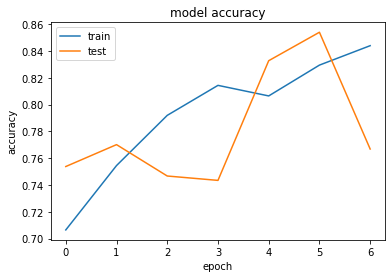

[0.7064999938011169, 0.7545271515846252, 0.7919999957084656, 0.8143863081932068, 0.8065000176429749, 0.8295000195503235, 0.843999981880188]


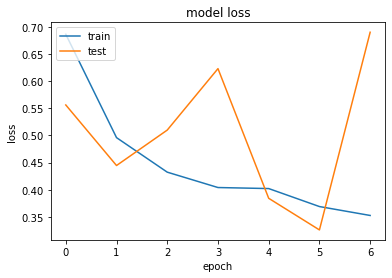

[0.6866182088851929, 0.496036559343338, 0.4323617219924927, 0.404026597738266, 0.4021163284778595, 0.3689557611942291, 0.3525214195251465]


In [42]:

# plotting graphs 
print(vgghist.history.keys())
# summarize history for accuracy
plt.plot(vgghist.history['acc'])
plt.plot(vgghist.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
print(vgghist.history['acc'])
# summarize history for loss
plt.plot(vgghist.history['loss'])
plt.plot(vgghist.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
print(vgghist.history['loss'])

In [43]:
model.summary()

Model: "functional_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
resnet50_input (InputLayer)  [(None, None, None, 3)]   0         
_________________________________________________________________
resnet50 (Functional)        (None, 2048)              23587712  
_________________________________________________________________
dense_10 (Dense)             (None, 1)                 2049      
_________________________________________________________________
flatten_3 (Flatten)          (None, 1)                 0         
_________________________________________________________________
dense_11 (Dense)             (None, 512)               1024      
_________________________________________________________________
dropout_3 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_12 (Dense)             (None, 1)                

92/92 [==============================] - 326s 4s/step


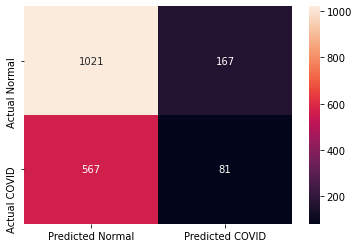

In [22]:
from sklearn.metrics import classification_report,confusion_matrix
preds = model.predict(validation_generator,verbose=1)
predictions = preds.copy()
predictions[predictions <= 0.5] = 0
predictions[predictions > 0.5] = 1
cm = pd.DataFrame(data=confusion_matrix(validation_generator.classes, predictions, labels=[0, 1]),index=["Actual Normal", "Actual COVID"],
columns=["Predicted Normal", "Predicted COVID"])
import seaborn as sns
sns.heatmap(cm,annot=True,fmt="d")

# VGG19

In [24]:
import os 
import zipfile 
import tensorflow as tf 
from tensorflow.keras.preprocessing.image import ImageDataGenerator 
from tensorflow.keras import layers 
from tensorflow.keras import Model 
import matplotlib.pyplot as plt

In [25]:
# Add our data-augmentation parameters to ImageDataGenerator
train_datagen = ImageDataGenerator(rescale = 1./255.,rotation_range = 40, width_shift_range = 0.2, height_shift_range = 0.2, shear_range = 0.2, zoom_range = 0.2, horizontal_flip = True)

# Note that the validation data should not be augmented!
test_datagen = ImageDataGenerator( rescale = 1.0/255. )

In [26]:
from tensorflow.keras.applications.vgg19 import VGG19
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.vgg19 import preprocess_input
from tensorflow.keras.models import Model
import numpy as np

base_model = VGG19(weights='imagenet')
model = Model(inputs=base_model.input, outputs=base_model.get_layer('block4_pool').output)


In [27]:
# Flow training images in batches of 20 using train_datagen generator
train_generator = train_datagen.flow_from_directory(r'C:\Users\Hp\COVID-19 CT\CT\for_training', batch_size = 20, class_mode = 'binary', target_size = (224, 224))

# Flow validation images in batches of 20 using test_datagen generator
validation_generator = test_datagen.flow_from_directory( r'C:\Users\Hp\COVID-19 CT\CT\for_testing',  batch_size = 20, class_mode = 'binary', target_size = (224, 224))


Found 6208 images belonging to 2 classes.
Found 1836 images belonging to 2 classes.


In [28]:
for layer in base_model.layers:
    layer.trainable = False

In [38]:
# Flatten the output layer to 1 dimension
x1 = layers.Flatten()(base_model.output)

# Add a fully connected layer with 512 hidden units and ReLU activation
x1 = layers.Dense(512, activation='relu')(x1)

# Add a dropout rate of 0.5
x1 = layers.Dropout(0.5)(x1)

# Add a final sigmoid layer for classification
x1 = layers.Dense(1, activation='sigmoid')(x1)

model = tf.keras.models.Model(base_model.input, x1)

model.compile(optimizer = tf.keras.optimizers.RMSprop(lr=0.0001), loss = 'binary_crossentropy',metrics = ['acc'])

In [ ]:
vgghist19 = model.fit(train_generator, validation_data = validation_generator, steps_per_epoch = 150, epochs = 3)

Epoch 1/3
146/150 [============================>.] - ETA: 36s - loss: 0.6165 - acc: 0.8616

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix
preds = model.predict(validation_generator,verbose=1)
predictions = preds.copy()
predictions[predictions <= 0.5] = 0
predictions[predictions > 0.5] = 1
cm = pd.DataFrame(data=confusion_matrix(validation_generator.classes, predictions, labels=[0, 1]),index=["Actual Normal", "Actual COVID"],
columns=["Predicted Normal", "Predicted COVID"])
import seaborn as sns
sns.heatmap(cm,annot=True,fmt="d")

# ResNet50

In [30]:
# Add our data-augmentation parameters to ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255., rotation_range = 40, width_shift_range = 0.2, height_shift_range = 0.2, shear_range = 0.2, zoom_range = 0.2, horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1.0/255.)

train_generator = train_datagen.flow_from_directory(r'C:\Users\Hp\COVID-19 CT\CT\for_training', batch_size = 20, class_mode = 'binary', target_size = (224, 224))

validation_generator = test_datagen.flow_from_directory(r'C:\Users\Hp\COVID-19 CT\CT\for_testing', batch_size = 20, class_mode = 'binary', target_size = (224, 224))


Found 6208 images belonging to 2 classes.
Found 1836 images belonging to 2 classes.


In [31]:
from tensorflow.keras.applications import ResNet50

base_model = ResNet50(input_shape=(224, 224,3), include_top=False, weights="imagenet")

In [32]:
for layer in base_model.layers:
    layer.trainable = False

In [33]:
from tensorflow.keras.applications import ResNet50
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dense, Flatten, GlobalAveragePooling2D

base_model = Sequential()
base_model.add(ResNet50(include_top=False, weights='imagenet', pooling='max'))
base_model.add(Dense(1, activation='sigmoid'))

In [34]:
base_model.compile(optimizer = tf.keras.optimizers.SGD(lr=0.0001), loss = 'binary_crossentropy', metrics = ['acc'])

In [36]:
resnet_history = base_model.fit(train_generator, validation_data = validation_generator, steps_per_epoch = 150, epochs = 3)


Epoch 1/3
150/150 [==============================] - 2773s 18s/step - loss: 0.7016 - acc: 0.8067 - val_loss: 1.6439 - val_acc: 0.3578
Epoch 2/3
150/150 [==============================] - 3893s 26s/step - loss: 0.6693 - acc: 0.8069 - val_loss: 2.1507 - val_acc: 0.5893
Epoch 3/3
150/150 [==============================] - 1648s 11s/step - loss: 0.5937 - acc: 0.8323 - val_loss: 2.0616 - val_acc: 0.6416


dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])


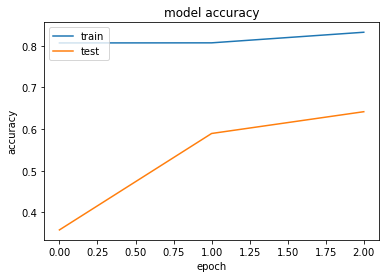

[0.8066666722297668, 0.8068942427635193, 0.8323333263397217]


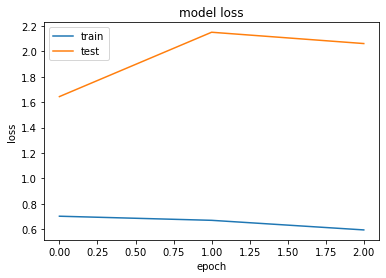

[0.7016432285308838, 0.6692523956298828, 0.5936866998672485]


In [44]:

# plotting graphs 
print(resnet_history.history.keys())
# summarize history for accuracy
plt.plot(resnet_history.history['acc'])
plt.plot(resnet_history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
print(resnet_history.history['acc'])
# summarize history for loss
plt.plot(resnet_history.history['loss'])
plt.plot(resnet_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
print(resnet_history.history['loss'])

92/92 [==============================] - 228s 2s/step


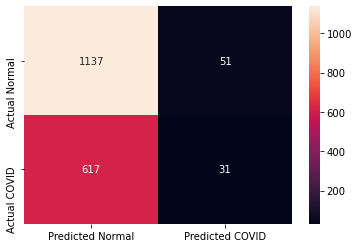

In [37]:
from sklearn.metrics import classification_report,confusion_matrix
preds = base_model.predict(validation_generator,verbose=1)
predictions = preds.copy()
predictions[predictions <= 0.5] = 0
predictions[predictions > 0.5] = 1
cm = pd.DataFrame(data=confusion_matrix(validation_generator.classes, predictions, labels=[0, 1]),index=["Actual Normal", "Actual COVID"],
columns=["Predicted Normal", "Predicted COVID"])
import seaborn as sns
sns.heatmap(cm,annot=True,fmt="d")